# Simple Linear Regression

## 1.Linear regression
- Linear regression은 종속 변수 $y$와 한개 이상의 독립 변수 $X$와의 선형 관계를 모델링
- 독립 변수 : Input Data
- 종속 변수 : 독립 변수에 의해 영향을 받는 변수(Label)

- 선형 관계의 modeling은 1차로 이루어진 직선을 구하는 것
- Input와 Label 데이터의 관계를 가장 잘 설명하는 최적의 직선을 찾아냄으로써 독립 변수와 종속 변수 사이의 관계를 도출해 내는 과정

# simple linear regression
- 독립 변수가 1개인 simple linear regression example
- 변수가 하나인 직선 $$f(x_i) = wx_i + b$$


<img src="https://nbviewer.jupyter.org/github/engineersCode/EngComp6_deeplearning/blob/master/images/residuals.png
" width="400" height="300" />



- Goal : 예측한 값과 실제 데이터가 가장 비슷한 직선을 찾는것
- model 이 예측한 값 : $f(x_i)$
- 실제 데이터 : $y$ 입니다.  

- Cost Function
    - 실제 데이터(위 그림에서 빨간 점) 과 직선 사이의 차이를 줄이는 것이 우리의 목적 
$$\text{cost function} = \frac{1}{N}\sum_{i=1}^n (y_i - f(x_i))^2$$


- cost function을 최소로 하는 $w$와 $b$를 찾아보자. 
- 이차함수의 최솟값을 구하는 방법은? 

### 1-1. 미분

다음 식의 최솟값을 어떻게 찾을 수 있을까? 
$$f(w) = w^2 + 3w -5$$

- 미분한 값이 0이 되는 지점 -> 최솟값이 되는 지점 (왜?) 

In [ ]:
# SymPy : 기호 계산을 위한 오픈 소스 Python 라이브러리

In [ ]:
# !pip install sympy

In [1]:
import sympy
import numpy

from matplotlib import pyplot
%matplotlib inline
sympy.init_printing()

In [ ]:
x = sympy.Symbol("x", real= True)

f = x**2 + 1*x -6
f

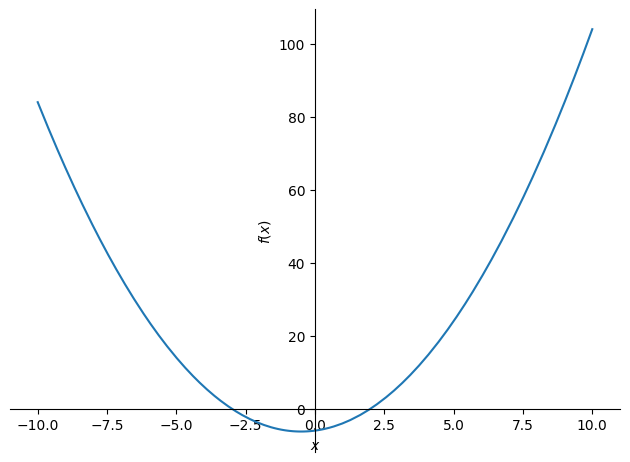

In [ ]:
sympy.plotting.plot(f)

In [ ]:
# 1차 미분

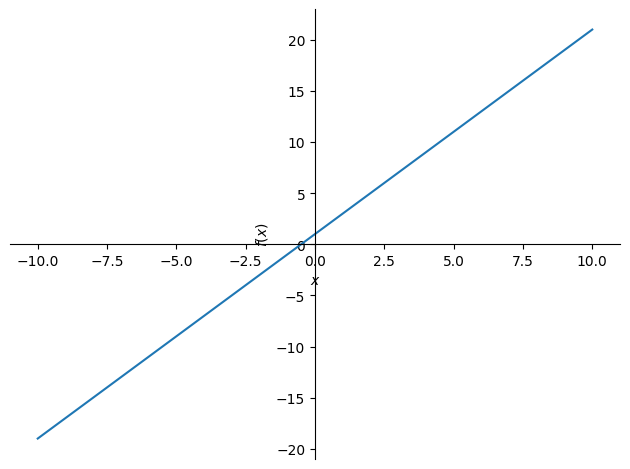

In [ ]:
fprime = f.diff(x)
fprime
sympy.plotting.plot(fprime)

In [ ]:
# 1차 미분식의 해
sympy.solve(fprime, x)

In [ ]:
fp_num = sympy.lambdify(x, fprime)

In [ ]:
x = 5
for i in range(100):
    x = x - fp_num(x)*0.1

In [ ]:
print(x)

-0.4999999988796302


### 1-2.Gradient Descent
- Gradient Descent 구현

<img src="https://nbviewer.jupyter.org/github/engineersCode/EngComp6_deeplearning/blob/master/images/descent.png
" width="400" height="300" />


- 1-1와 1-2의 결과를 비교해 보자 
- Gradient descent 방법을 실제 데이터에 적용 

### 1-3.Linear regression

In [47]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

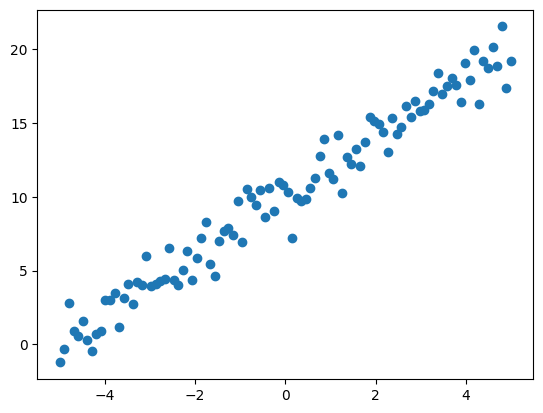

In [ ]:
x_data = np.linspace(-5, 5, 100) # 정규분포에서 난수 생성후 10을 곱해줌
weight_1 = 2
weight_0 = 10
y_data = weight_1 * x_data + weight_0 + np.random.normal(size=100) 

# x에 2를 곱한다음 + 편향10 + 난수를 더해준다(noise)
# y = 2 * x + 10 # 기울기가 2인 직선 편향이 10

pyplot.scatter(x_data,y_data)

In [ ]:
# costfunction

w_1, x, w_0, y = sympy.symbols("w_1 x w_0 y")
# cost_function = (weight_1 * x_data + weight_0 - y_data) ** 2
cost_function = (w_1 * x + w_0 - y) ** 2

In [ ]:
cost_function

In [ ]:
# 기울기 함수 정의
grad_w_0 = sympy.lambdify([w_1, x, w_0, y], cost_function.diff(w_0), "numpy")
grad_w_1 = sympy.lambdify([w_1, x, w_0, y], cost_function.diff(w_1), "numpy")

In [ ]:
grad_w_0


<function _lambdifygenerated(w_1, x, w_0, y)>

In [ ]:
# w_0, w_1 의 초기값 지정
w_0 = 10.0
w_1 = 10.0

for i in range(100000):
    descent_w_0 = numpy.sum(grad_w_0(w_1, w_0, x_data, y_data))/len(x_data)
    descent_w_1 = numpy.sum(grad_w_1(w_1, w_0, x_data, y_data))/len(x_data)
    w_0 = w_0-descent_w_0*0.01
    w_1 = w_1-descent_w_1*0.01


In [ ]:
print(w_0)
print(w_1)

9.072288061393715
1.1089312509823968


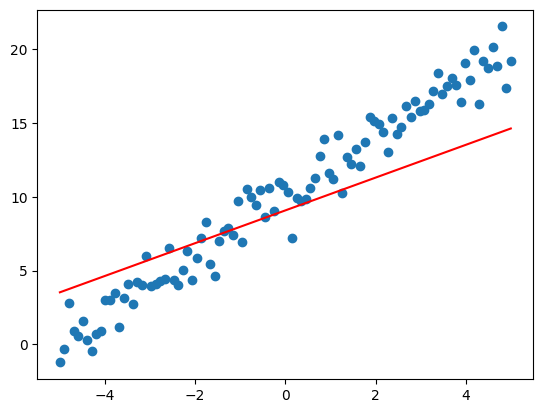

In [ ]:
pyplot.scatter(x_data,y_data)
pyplot.plot(x_data, w_1*x_data + w_0, '-r');

In [ ]:
# linear regression 을 이용해 지구 온도변화를 예측해 보세요 
# https://go.gwu.edu/engcomp1data5?accessType=DOWNLOAD
# 1. 연도에 따른 데이터 상승을 그래프로 확인하세요
# 2. sklearn을 이용해 linear 그래프를 예측해 보세요 
# 메일로 전송

In [3]:
import numpy as np
import pandas as pd

In [10]:
from sklearn.linear_model import LinearRegression 

In [20]:
url="https://go.gwu.edu/engcomp1data5?accessType=DOWNLOAD"
earth=pd.read_csv(url)

In [5]:
earth.head()

,Global Land Temperature Anomalies,January-December
0,Units: Degrees Celsius,NaN
1,Base Period: 1901-2000,NaN
2,Missing: -999.0000,NaN
3,Year,Value
4,1880,-0.47


In [21]:
earth.columns=earth.loc[3]
earth.head()

3,Year,Value
0,Units: Degrees Celsius,NaN
1,Base Period: 1901-2000,NaN
2,Missing: -999.0000,NaN
3,Year,Value
4,1880,-0.47


In [22]:
earth=earth[4:]
earth.head()

3,Year,Value
4,1880,-0.47
5,1881,-0.45
6,1882,-0.41
7,1883,-0.60
8,1884,-0.60


In [23]:
earth=earth.dropna(axis=0)

In [33]:
earth.reset_index(inplace=True,drop=True)

In [28]:
del earth['index']

In [34]:
earth

3,Year,Value
0,1880,-0.47
1,1881,-0.45
2,1882,-0.41
3,1883,-0.60
4,1884,-0.60
...,...,...
132,2012,0.92
133,2013,1.01
134,2014,1.02
135,2015,1.35


In [29]:
earth.info()
earth.head()
earth.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    137 non-null    object
 1   Value   137 non-null    object
dtypes: object(2)
memory usage: 2.3+ KB


In [39]:
x_test.shape

In [74]:
x_test=earth.iloc[:,:1]
y_test=earth.iloc[:,1:]

In [60]:
x=np.asarray(x_test,dtype='datetime64[s]')
y=np.asarray(y_test,float)

In [61]:
y

array([-0.47, -0.45, -0.41, -0.6 , -0.6 , -0.52, -0.48, -0.47, -0.46,
       -0.31, -0.49, -0.55, -0.52, -0.56, -0.35, -0.4 , -0.27, -0.29,
       -0.37, -0.18, -0.13, -0.09, -0.33, -0.39, -0.46, -0.42, -0.2 ,
       -0.6 , -0.49, -0.39, -0.33, -0.44, -0.51, -0.34, -0.07, -0.07,
       -0.36, -0.51, -0.37, -0.32, -0.28, -0.06, -0.24, -0.21, -0.26,
       -0.1 ,  0.01, -0.15, -0.1 , -0.4 , -0.08, -0.03, -0.02, -0.34,
       -0.02, -0.14, -0.12, -0.03,  0.17,  0.09,  0.04,  0.11,  0.07,
        0.09,  0.21, -0.08, -0.01,  0.06,  0.06, -0.05, -0.33, -0.07,
       -0.08,  0.17, -0.16, -0.13, -0.42, -0.05,  0.13,  0.05, -0.04,
        0.1 ,  0.16,  0.21, -0.24, -0.13, -0.07, -0.  , -0.11, -0.1 ,
        0.02, -0.04, -0.18,  0.29, -0.21,  0.12, -0.25,  0.21,  0.08,
        0.15,  0.27,  0.49,  0.09,  0.49,  0.05,  0.07,  0.28,  0.41,
        0.55,  0.39,  0.59,  0.53,  0.26,  0.35,  0.45,  0.77,  0.35,
        0.68,  0.96,  0.8 ,  0.64,  0.83,  0.94,  0.89,  0.81,  1.05,
        0.92,  1.1 ,

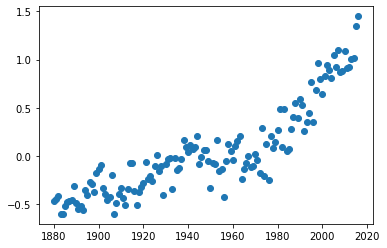

In [62]:
plt.scatter(x,y)


In [64]:
model=LinearRegression()

In [75]:
x_test

3,Year
0,1880
1,1881
2,1882
3,1883
4,1884
...,...
132,2012
133,2013
134,2014
135,2015


In [76]:
model.fit(x_test,y_test)

LinearRegression()

In [78]:
model.coef_ #회귀계수

array([[0.01037028]])

In [79]:
model.intercept_ # y 절편의 값

array([-20.14868538])

In [81]:
y_predict=model.predict(x_test)

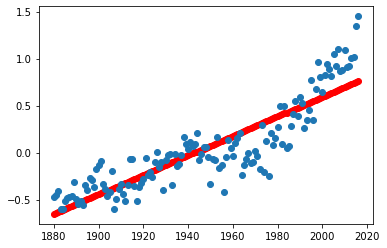

In [83]:
plt.scatter(x,y_predict,c='r')
plt.scatter(x,y)

In [ ]:
# dataset >>>> model select 
# 지도학습: x->y
# 비지도학습:  X to X1,X2,X3,...